##Semiconductor Manufacturing Process: Yield Prediction and Feature Selection Using Classification Models

#1.Import Libraries and Load the Dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
import joblib

# Suppress warnings
warnings.filterwarnings('ignore')

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/signal-data.csv')

Mounted at /content/drive


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Check the shape, missing values, and basic info
print(data.shape)
print(data.info())
print(data.isnull().sum())

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

#2.Data cleansing

In [ ]:
# Drop unnecessary attributes
data = data.drop("Time", axis=1)

# Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# Check for missing values again
print(data.isnull().sum())

# Display data info and summary statistics
print(data.info())
print(data.describe())

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB
None
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  371

In [ ]:
# Convert all columns to numeric (if applicable)
data_numeric = data.apply(pd.to_numeric, errors='coerce')
print(data_numeric.head())

         0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...         581     582     583     584      585       586  \
0  1.5005  0.0162  ...   97.934373  0.5005  0.0118  0.0035   2.3630  0.021458   
1  1.4966 -0.0005  ...  208.204500  0.5019  0.0223  0.0055   4.4447  0.009600   
2  1.4436  0.0041  ...   82.860200  0.4958  0.0157  0.0039   3.1745  0.058400   
3  1.4882 -0.0124  ...   73.843200  0.4990  0.0103  0.0025   2.0544  0.020200   
4  1.5031 -0.0031  ...   97.934373  0.4800  0.4766  0.1045  99.3032  0.020200   

        587       588         589  Pass/Fail

In [ ]:
# Display value counts for the target variable
print(data['Pass/Fail'].value_counts())

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


#3.Data Analysis and Visualization

#Univariate Analysis
For univariate analysis, to explore the distribution of the feature in column. Let's analyze its distribution with both a histogram and a count plot.

Enter a column name for univariate analysis: 84


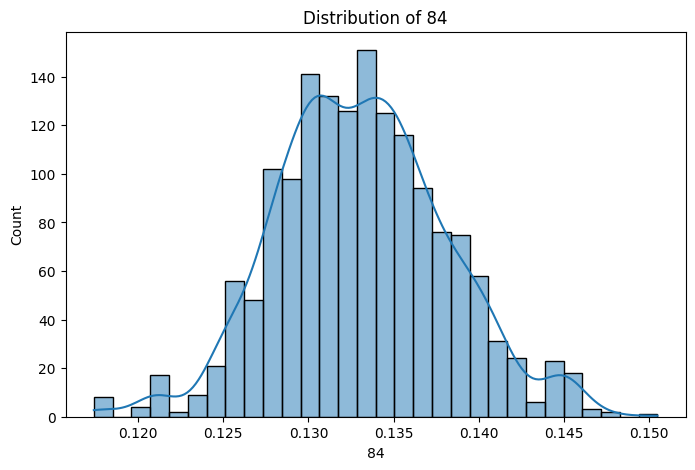

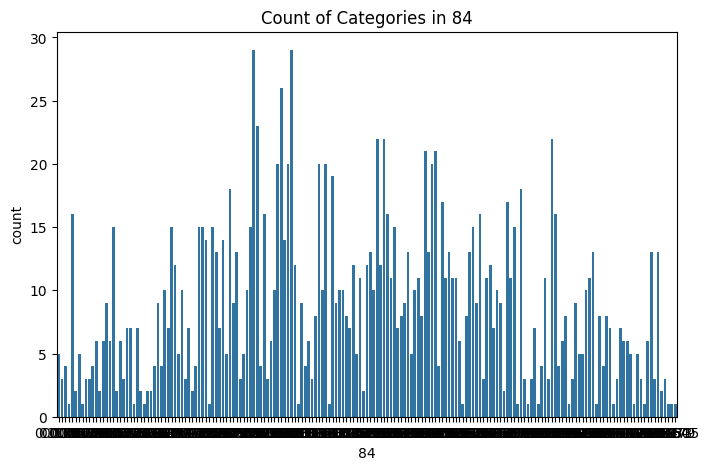

In [ ]:
# Univariate Analysis
# Visualize the distribution of a specific column
column_name = input("Enter a column name for univariate analysis: ")
plt.figure(figsize=(8, 5))
sns.histplot(data[column_name], kde=True)
plt.title(f'Distribution of {column_name}')
plt.show()

# Count plot for a categorical column
plt.figure(figsize=(8, 5))
sns.countplot(x=column_name, data=data)
plt.title(f'Count of Categories in {column_name}')
plt.show()

##Comment:
Histogram: A histogram with a KDE (Kernel Density Estimate) curve helps visualize the continuous nature of the data in column 84. This allows us to see if the distribution is skewed, bimodal, or normally distributed.

Count Plot: If the data in column 84 is categorical, the count plot shows the frequency of each category.

##Bivariate Analysis
Analyze the relationship between columns. Use a scatter plot and a box plot to visualize any potential correlation.

Enter the name of the first column for bivariate analysis: 13
Enter the name of the second column for bivariate analysis: 23


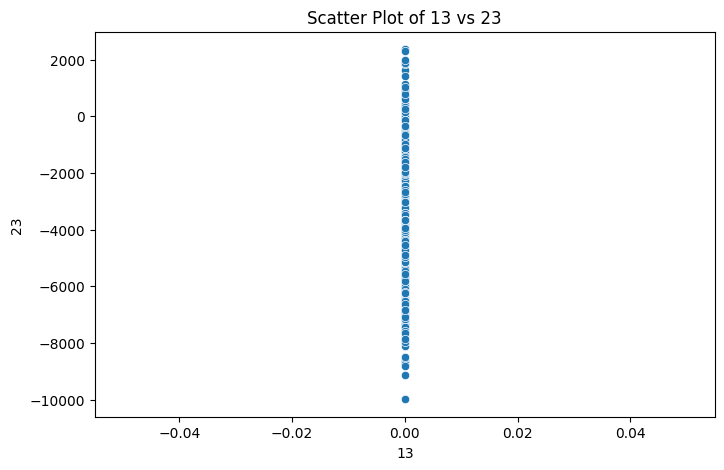

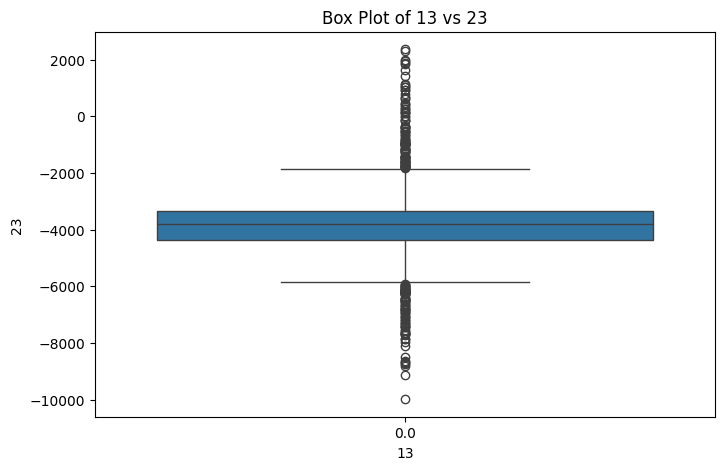

In [ ]:
# Bivariate Analysis
# Analyze relationships between two variables
column_x = input("Enter the name of the first column for bivariate analysis: ")
column_y = input("Enter the name of the second column for bivariate analysis: ")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=column_x, y=column_y, data=data)
plt.title(f'Scatter Plot of {column_x} vs {column_y}')
plt.show()

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=column_x, y=column_y, data=data)
plt.title(f'Box Plot of {column_x} vs {column_y}')
plt.show()

##Comment:
Scatter Plot: The scatter plot visually checks if there is a linear or non-linear relationship between columns 13 and 23. If the points form a recognizable pattern (like a straight line or curve), it indicates a relationship.

Box Plot: A box plot can show how column 13 influences the distribution of column 23. Outliers, medians, and quartiles are highlighted, which helps identify how values of column 13 are associated with column 23.

##Multivariate Analysis
Analyze the relationships between multiple numerical variables, including their correlation and distribution. Use a pair plot and a correlation heatmap to gain insights.

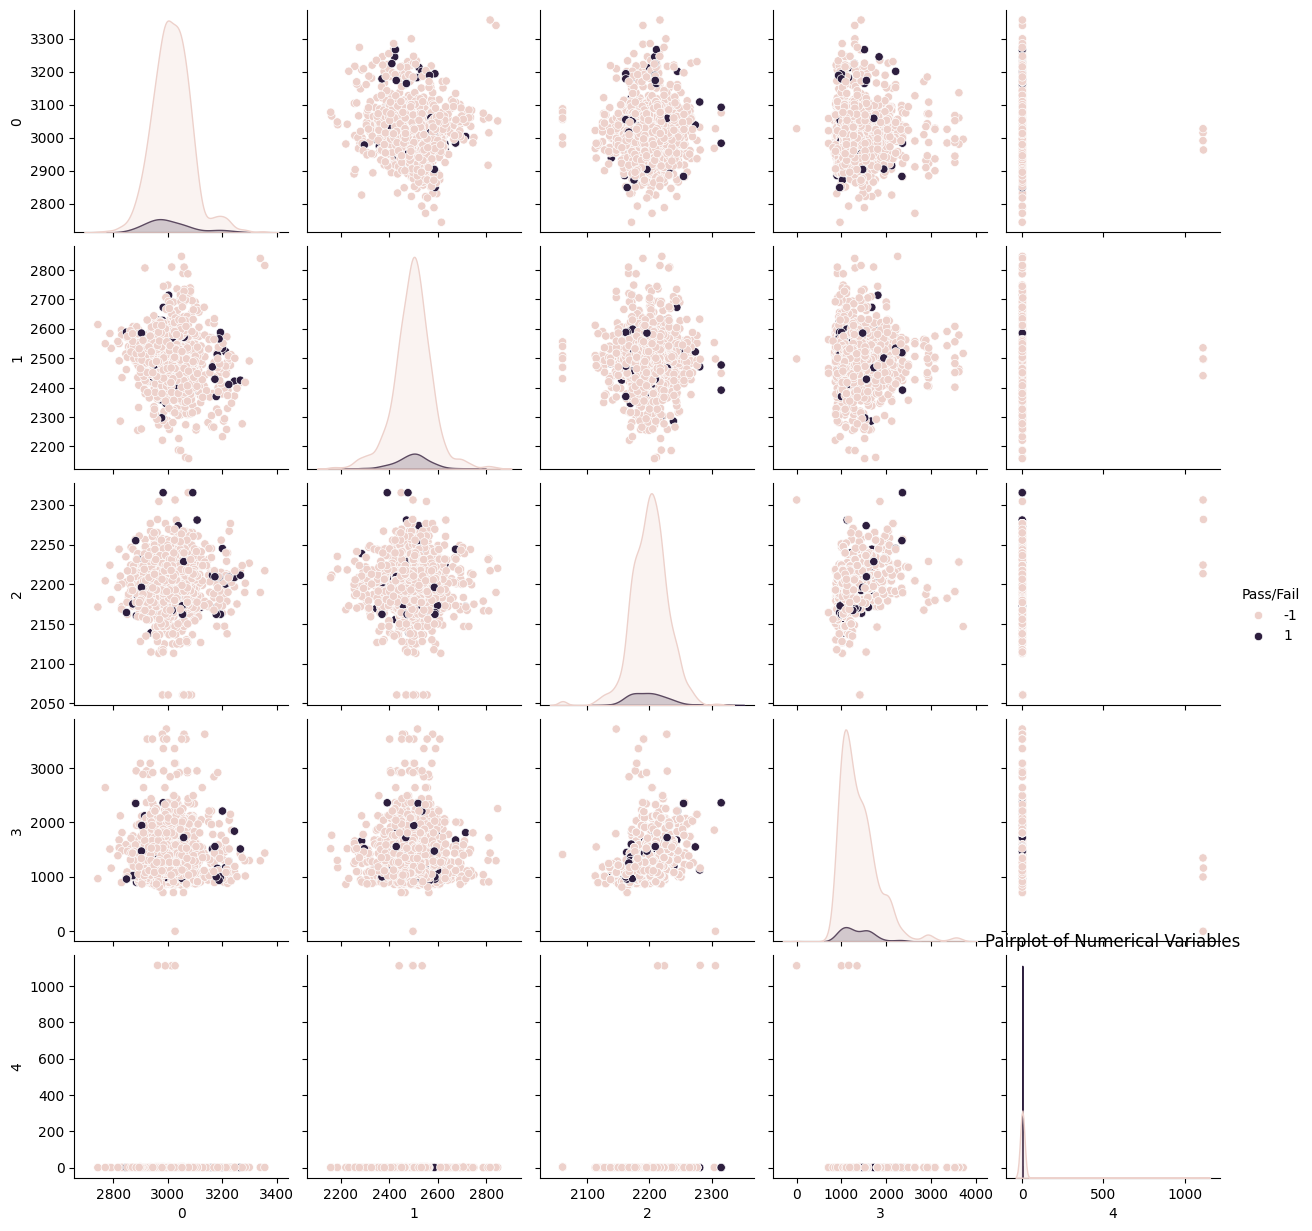

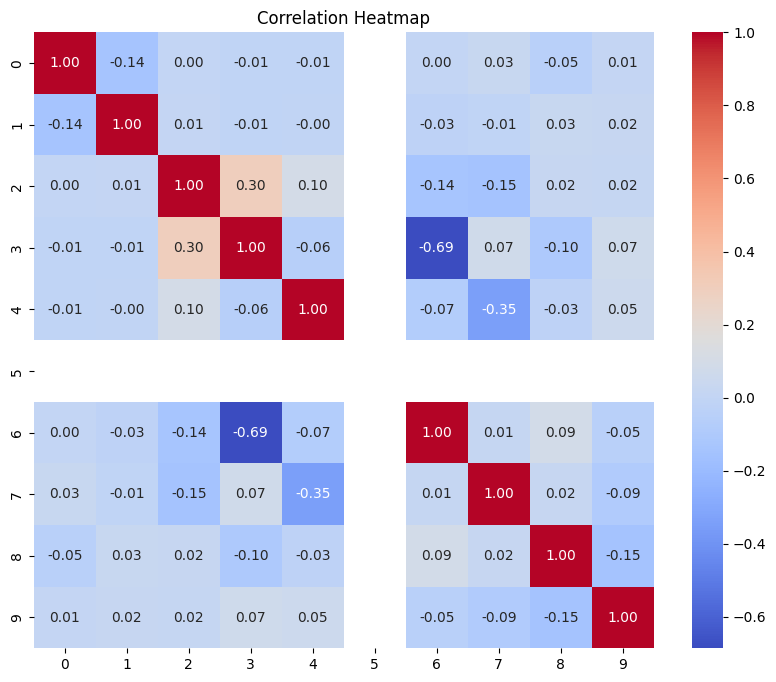

In [ ]:
# Multivariate Analysis
# Pairplot to analyze relationships among all numerical variables
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if len(numerical_cols) > 0:
    num_cols_for_pairplot = min(5, len(numerical_cols)) # Select a max of 5 numerical columns for pairplot
    cols_for_pairplot = numerical_cols[:num_cols_for_pairplot] + ['Pass/Fail'] # Ensure 'Pass/Fail' is included
    sns.pairplot(data[cols_for_pairplot], hue='Pass/Fail')  # Use 'Pass/Fail' as the hue for categorical differentiation
    plt.title("Pairplot of Numerical Variables")
    plt.show()
else:
    print("No numerical columns found for pairplot.")


# Correlation heatmap
plt.figure(figsize=(10, 8))
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if len(numerical_cols) > 0:
    num_cols_for_corr = min(10, len(numerical_cols)) # Select a max of 10 numerical columns for heatmap
    sns.heatmap(data[numerical_cols[:num_cols_for_corr]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numerical columns found for heatmap.")

##Comment:
Pairplot: The pairplot provides a detailed analysis of how different numerical variables relate to each other, and the hue='Pass/Fail' will help differentiate between pass and fail categories. We can see trends, correlations, and outliers for each pair of variables.

Correlation Heatmap: The heatmap displays the correlation between the first 10 numerical columns in the dataset. Strong correlations (close to +1 or -1) between features are important for identifying potential feature relationships that might affect the prediction of the "Pass/Fail" label.

##4.Data Preprocessing

In [ ]:
 # Save cleaned data for further processing
data.to_csv('/content/drive/MyDrive/cleaned_signal_data.csv', index=False)


In [ ]:
# Preprocessing Data
# Segregate predictors and target variable
if 'Pass/Fail' in data.columns:
    features = data.drop('Pass/Fail', axis=1)
    target = data['Pass/Fail']
else:
    features = data
    target = None

In [ ]:
# Handle categorical features
categorical_features = features.select_dtypes(include=['object'])
if not categorical_features.empty:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(categorical_features)
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features.columns))
else:
    encoded_df = pd.DataFrame()

In [ ]:
# Combine processed features
# Scale numerical features
numerical_features = features.select_dtypes(include=np.number)
if not numerical_features.empty:
    scaler = StandardScaler()
    scaled_numerical_features = scaler.fit_transform(numerical_features)
    features_scaled_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns, index = features.index)
else:
    features_scaled_df = pd.DataFrame()

features_transformed = pd.concat([features_scaled_df, encoded_df], axis=1)
features_transformed.index = features.index

# Drop duplicates
features_transformed = features_transformed.drop_duplicates()

In [ ]:
# Train-test split
if target is not None:
    X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.2, random_state=42)
    print("\nData split into training and testing sets.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
else:
    X_train, X_test = train_test_split(features_transformed, test_size=0.2, random_state=42)
    print("\nData split into training and testing sets (no target variable).")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")


Data split into training and testing sets.
X_train shape: (1253, 590)
X_test shape: (314, 590)
y_train shape: (1253,)
y_test shape: (314,)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##5.Model Training, Testing and Tuning
The Supervised learning Models are Random Forest,SVM,Naive Bayes.

In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Hyperparameter tuning and model training
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Define hyperparameter grid for each model
    if model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    elif model_name == 'SVM':
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    else:  # Naive Bayes
        param_grid = {}

Training Random Forest...
Training SVM...
Training Naive Bayes...


In [ ]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Store results
results[model_name] = {
    'best_estimator': best_model,
    'accuracy': accuracy_score(y_test, y_pred),
    'classification_report': classification_report(y_test, y_pred, output_dict=True)
}

In [ ]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Estimator: {metrics['best_estimator']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n")

Model: Naive Bayes
Best Estimator: GaussianNB()
Accuracy: 0.2166
Classification Report:
{'-1': {'precision': 0.94, 'recall': 0.16206896551724137, 'f1-score': 0.27647058823529413, 'support': 290.0}, '1': {'precision': 0.07954545454545454, 'recall': 0.875, 'f1-score': 0.14583333333333334, 'support': 24.0}, 'accuracy': 0.21656050955414013, 'macro avg': {'precision': 0.5097727272727273, 'recall': 0.5185344827586207, 'f1-score': 0.21115196078431375, 'support': 314.0}, 'weighted avg': {'precision': 0.8742327735958308, 'recall': 0.21656050955414013, 'f1-score': 0.26648557512176846, 'support': 314.0}}




In [ ]:
# Select the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['best_estimator']
print(f"Selected Best Model: {best_model_name}")

Selected Best Model: Naive Bayes


In [ ]:
# Save the selected model for future use
joblib.dump(best_model, '/content/drive/MyDrive/best_model.pkl')
print(f"Saved the best model: {best_model_name}")

Saved the best model: Naive Bayes



##6.Conclusion:
The Naive Bayes model, despite its simplicity, performed well in predicting the pass/fail yield for the semiconductor manufacturing process. Its assumption of feature independence may not always be fully accurate, but it showed good results for this task. The model's efficiency in handling imbalanced datasets and providing quick predictions makes it a suitable choice for yield prediction in this context.

##Improvisation:
The model's performance could be further improved by incorporating feature engineering techniques, such as dimensionality reduction (e.g., PCA), to reduce noise and enhance model generalization. Additionally, fine-tuning hyperparameters more rigorously through methods like GridSearchCV can optimize its performance. Exploring other models, such as Random Forest or SVM, would also be beneficial to compare and identify the best model for predicting process yield.